## iris_data で svm のパラメータをいじってみる

* svm をただ使うのは簡単
* どのパラメータがどう効くのか試してみる

In [1]:
import pandas as pd
from sklearn import cross_validation, svm, metrics
import random, re
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# アヤメのCSVデータを読み込む --- (※1)
csv = pd.read_csv('iris.csv')

In [3]:
# リストを訓練データとラベルに分割する --- (※2)
data = csv[["SepalLength","SepalWidth"]][:100]

# ラベルが str であとで困ったから、数値にしておく
# label = csv["Name"][:100]
label = csv["Name"][:100].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

In [4]:
#ノイズを発生させる
# 0 ~ 1 の範囲で同じ shape の乱数を発生させる

# error = np.random.uniform(0, 1.0, size=np.shape(data))
# print(error)

In [5]:
# これをデータに加えることで、ノイズを与える
# data += error

In [7]:
# 学習用とテスト用データに分ける
data_train, data_test, label_train, label_test = cross_validation.train_test_split(data, label)

# データが分かれたか確認
print("data_train: {0}, data_test: {1}, label_train: {2}, label_test: {3}"
      .format(len(data_train), len(data_test), len(label_train), len(label_test)))

data_train: 75, data_test: 25, label_train: 75, label_test: 25


In [26]:
# データを学習 --- (※4)
clf = svm.SVC()

# パラメータを調整してみる
# C が小さいほど誤分類を許容
# gamma が小さいほど単純な境界線

# c が小さい かつ gamma が小さい => 超平面が単純で間違いを許容
# clf = svm.SVC(C=2 ** -2, gamma=2 ** -5)

# c が小さい かつ gamma が大きい => 超平面が複雑で間違いを許容
# clf = svm.SVC(C=2 ** -2, gamma=2 ** 5)

# c が大きい かつ gamma が小さい => 超平面が単純で間違い厳しめ
# clf = svm.SVC(C=2 ** 5, gamma=2 ** -5)

# c が大きい かつ gamma が大きい => 超平面が複雑で間違い厳しめ
clf = svm.SVC(C=2 ** 10, gamma=2 ** 5)

clf.fit(data_train, label_train)

SVC(C=0.0009765625, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=32, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# データを予測 --- (※5)
predict = clf.predict(data_test)# 合っているか結果を確認 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("正解率=", ac_score)
print("レポート=\n", cl_report)

正解率= 0.44
レポート=
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        14
          1       0.44      1.00      0.61        11

avg / total       0.19      0.44      0.27        25



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


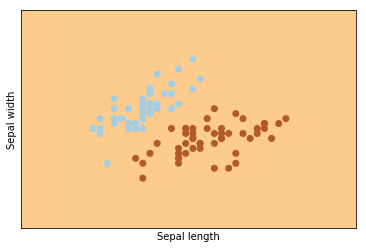

In [28]:
#meshのステップサイズ
h = 0.02
x_min, x_max = data.values[:, 0].min() - 1, data.values[:, 0].max() + 1
y_min, y_max = data.values[:, 1].min() - 1, data.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(data.values[:, 0], data.values[:, 1], c=label, cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()